## Internet Failures
<br/>
$\text{The process is discrete state but continuous time and can be modelled as a Counting}$ 
$\text{Process as the following characteristics hold true:}$ 

+ $\text{N(0) = 0 or P(N(0)=0) = 1: Arrivals only occur after t = 0.}$ 
+ $\text{N(t)} \in \{0,1,2,.. \} \forall t \in [0,$$\infty$$) \text{: Number of arrivals are countable.}$
+ $ \forall \text{ 0} \leqslant s < t, N(s) \leqslant N(t)$

$\text{The process given is also an arrival process because the following properties hold true:}$

+ $\text{Sum of inter-arrival times form a strictly increasing sequence}$
    - $S_{1} < S_{2} < S_{3} < ... < S_{n}$ $\text{: Since time is strictly increasing after every arrival.}$
+ $\text{The process starts at t = 0, N(0) = 0 or P(N(0)=0) = 1}$ 
+ $\text{There cannot be multiple arrivals in the same instant.}$
<br/>

$\text{Since the interarrival failure times are exponentially distributed, and the arrival rate}$
$\text{of failures is an average 2 times a day, it can be modelled as a Poission Process.}$

$\text{Formally, N(t) ~ Poisson(2t)}$
+ $\text{The interarrival times follow an exponential distribution}$
+ $\text{The sequence of inter-arrival times is a sequence of positive iids ~ exponential}(\lambda)$
$\text{and hence, it is a renewal process.}$
+ $\forall X \text{~ exponential}(\lambda), f_{X}(x) = \lambda e^{-\lambda x} $
      

$\text{(a) We simulate the Poisson Random Process from September 1, 2019 to September 10,}$
$\text{2019 for 10 days and plot a scatter plot, the distribution for number of failures along}$
$\text{with their CDF.}$

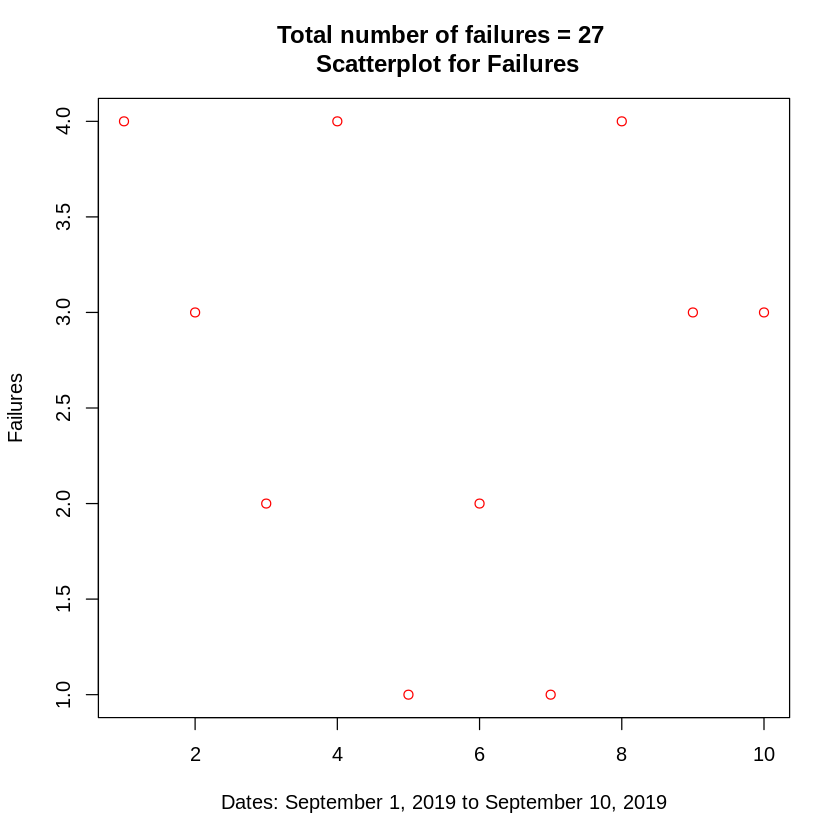

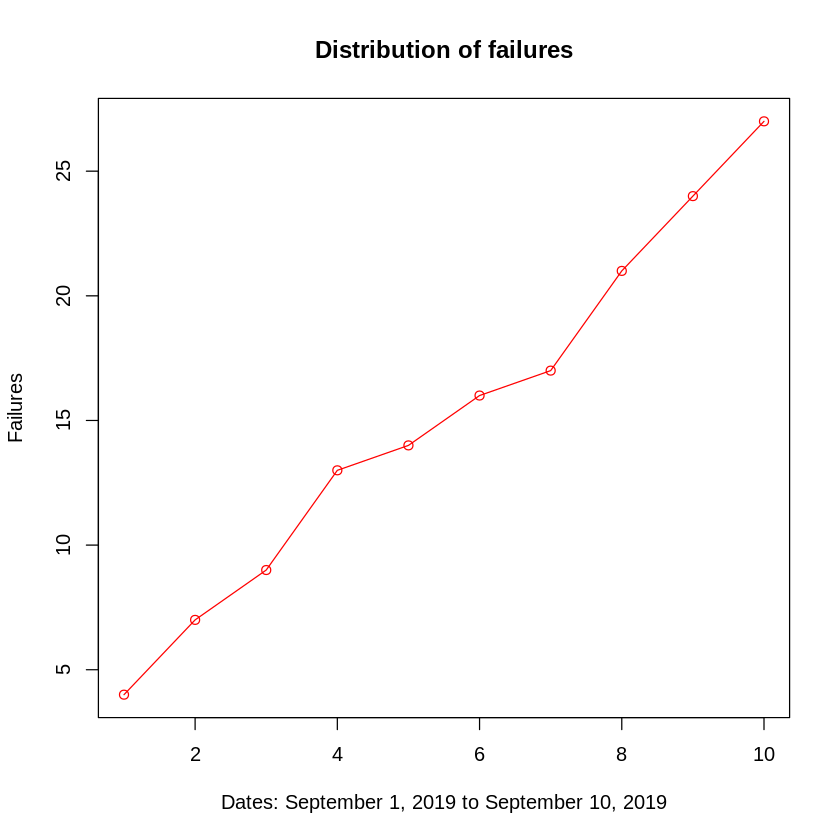

In [37]:
Failures = rpois(10, 2)
F = sum(Failures)
pmf = Failures
for(i in 2:10)
{
    Failures[i] = Failures[i]+Failures[i-1]
}
days <- 1:10
title=paste(paste("Total number of failures =",F),"\n Scatterplot for Failures")
plot(days, pmf, col='red', ylab='Failures', xlab='Dates: September 1, 2019 to September 10, 2019', main=title)
plot(days, Failures, type = 'o', col='red', xlab='Dates: September 1, 2019 to September 10, 2019', main=paste("Distribution of failures"))

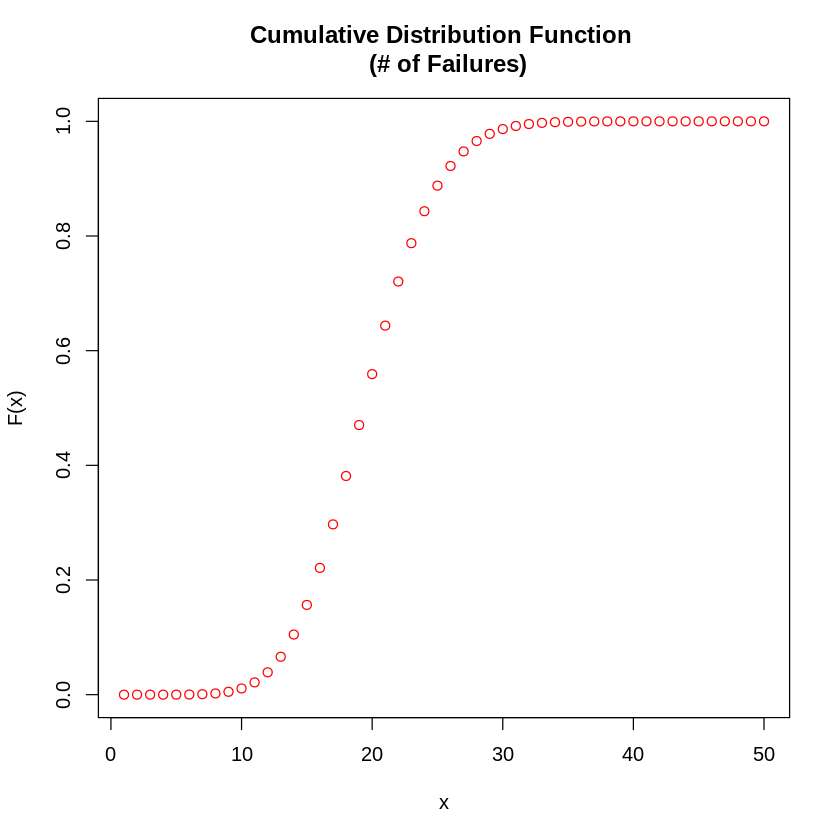

In [64]:
X = 1:50
CDF = ppois(X,20)
title = paste('Cumulative Distribution Function','\n (# of Failures)')
plot(X, CDF, col='red', ylab='F(x)', xlab='x', main=title)

$\text{(b) The density and the cumulative distribution for the first interarrival time are given below:}$

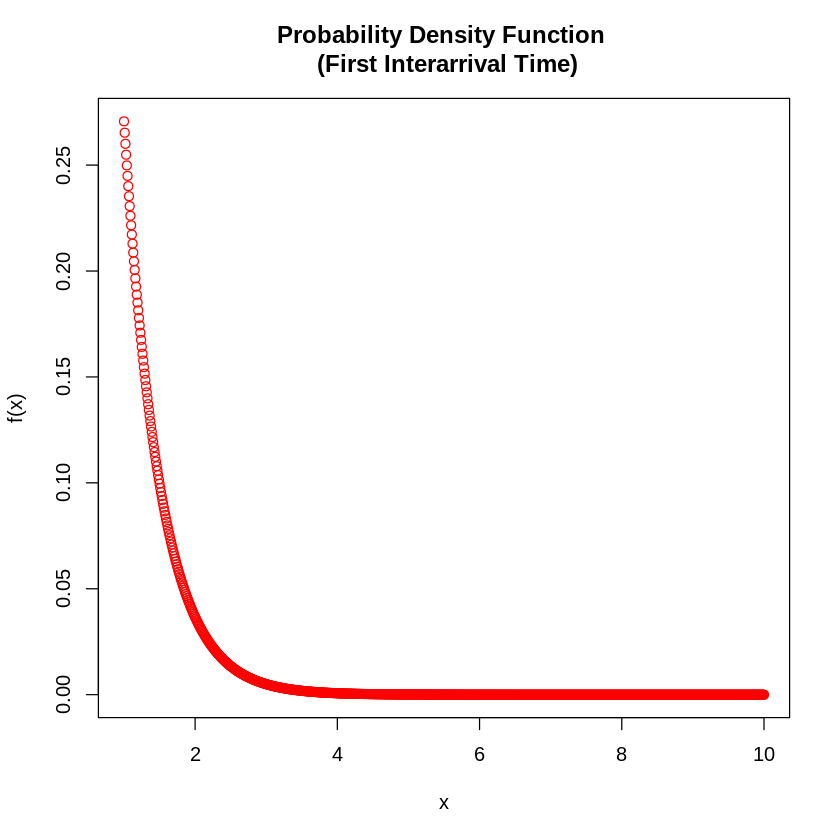

In [60]:
pdf <- dexp(seq(1,10,0.01),2)
x <- seq(1,10,0.01)
title_text = paste('Probability Density Function','\n (First Interarrival Time)')
plot(x, pdf, xlab="x", ylab="f(x)", main=title_text, col='red')

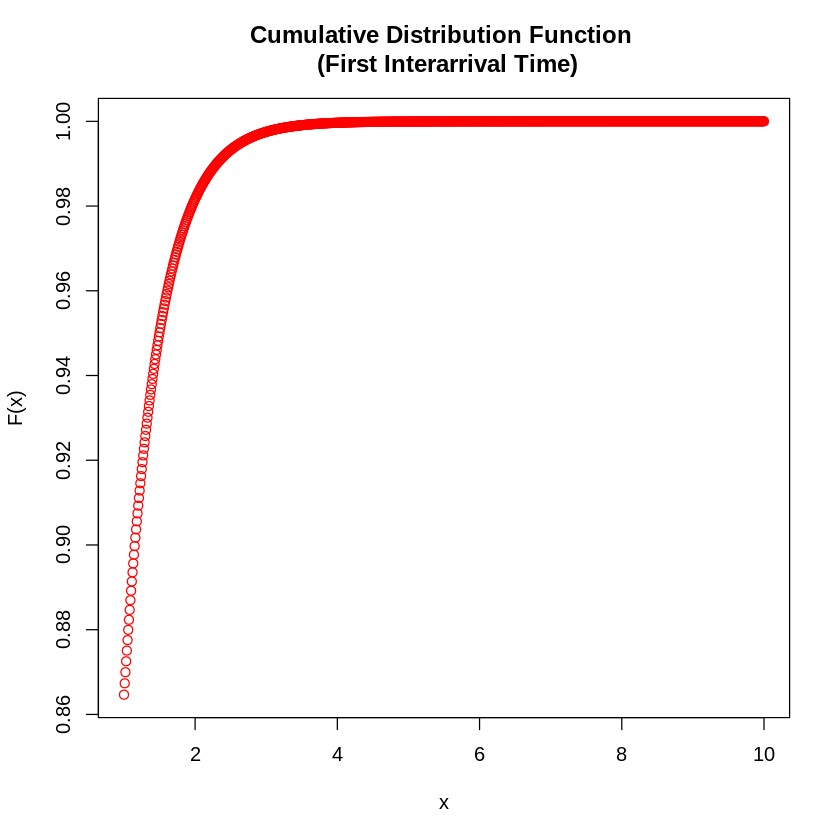

In [61]:
cdf = pexp(seq(1,10,0.01),2)
x <- seq(1,10,0.01)
title_text = paste('Cumulative Distribution Function','\n (First Interarrival Time)')
plot(x, cdf, xlab="x", ylab="F(x)", main=title_text, col='red')

$\text{(c) If there's a new server independent of the first server with failure rate 1.75}$
+ $\text{(i) Since both processes follow Poission}(\lambda t)\text{, we can compare their}$ $\text{expectations for a common time duration }t_{1} > 0.$
<br/>
$E[N_{1}] = \lambda_{1} t_{1} = 2 t_{1},$
$E[N_{2}] = \lambda_{2} t_{1} = 1.75 t_{1},$
$E[N_{2}] < E[N_{1}] \text{, therefore the expectation of failures is lesser in the new server}$
$\text{and as a result, the process of the newer server is better than the first one.}$

+ $\text{(ii) Since both processes follow Poisson}(\lambda t),\text{ we can study their combined process}$
$\text{as a merged Poisson process.}$
$\text{The proof of the same follows:}$

$\text{Since the two processes involve independent servers, we can derive the probability of}$
$\text{arrival of failures in the following way.}$

$\text{Consider random variable X such that}$
<br/>
$X = \left\{
    \begin{array}{ll}
          1 & \text{arrival of failure occurs} \\
          0 & \text{no arrival} \\
    \end{array} 
    \right.$ 


$\text{For a small interval }\delta$

 $\delta P(X=1) = \lambda_{1} \delta \lambda_{2} \delta + \lambda_{1} \delta (1 - \lambda_{2} \delta) + \lambda_{2} \delta (1 - \lambda_{1} \delta)$
 $\text{Upon linearizing the expression and ignoring terms ~ O}(\delta^{2})\text{, we obtain}$
 
 $\delta P(X=1) = \lambda_{1} \delta + \lambda_{2} \delta$
 
 $\delta P(X=1) = \delta(\lambda_{1} + \lambda_{2})$
 
 $\therefore \delta P(X=0) = 1 - \delta P(X=1) = 1  - \delta(\lambda_{1} + \lambda_{2})$
 
 $\text{We use this definition to show that the merged process is a Poisson Random Process.}$
 $\text{Again, for a small interval }\delta$
 
 $P(\tilde{N}(t,t+\delta)=0) = 1  - \delta(\lambda_{1} + \lambda_{2}) + O(\delta)$
 <br/>
 $P(\tilde{N}(t,t+\delta)=1) = \delta(\lambda_{1} + \lambda_{2}) + O(\delta)$
 <br/>
 $P(\tilde{N}(t,t+\delta)>1) = O(\delta)$
 
 $\therefore N(t) \text{~} Poisson((\lambda_{1} + \lambda_{2})t)$
 
 <br/>
 
 + $\text{(iii) The plot for density of total number of failures in a month is given below:}$
 
 







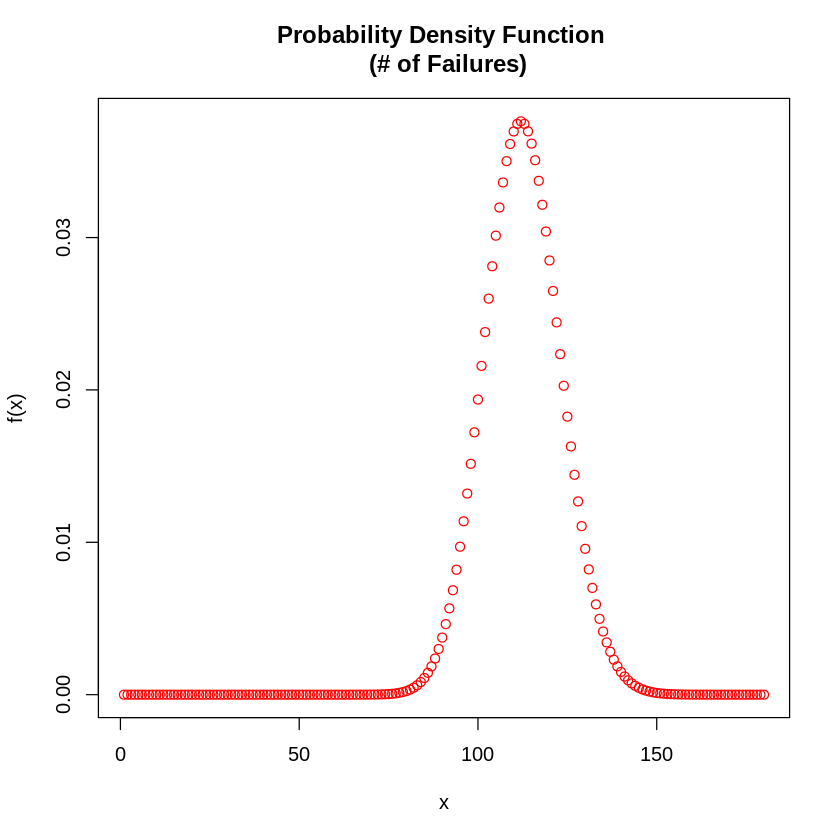

In [69]:
lambda_t = 3.75*30
X = 1:180
PDF = dpois(X,lambda_t)
title = paste('Probability Density Function','\n (# of Failures)')
plot(X, PDF, col='red', ylab='f(x)', xlab='x', main=title)

+ $\text{(iv) The density of the first interarrival times of the combined process is as follows:}$

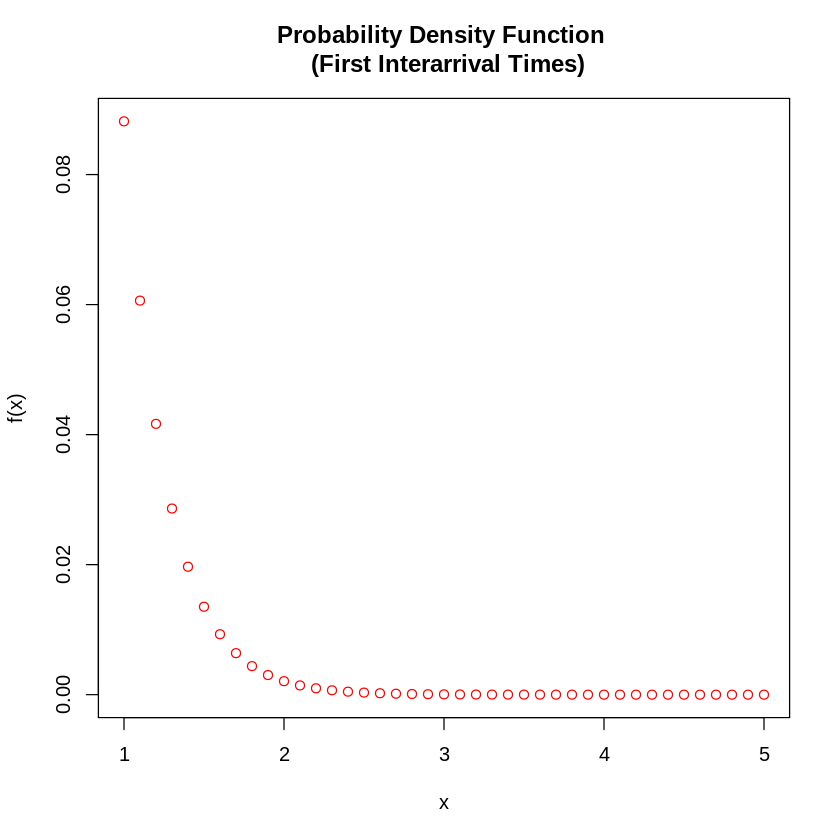

In [70]:
lambda = 3.75
X <- seq(1,5,0.1)
PDF <- dexp(X,lambda)
title_text = paste('Probability Density Function','\n (First Interarrival Times)')
plot(X, PDF, xlab="x", ylab="f(x)", main=title_text, col='red')

### Ashwin Singh
<br/>

### 2017222